<a href="https://colab.research.google.com/github/fabriziobasso/Colab_backup/blob/main/File_00_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<h1 align="center"><font color='#001ddd'> GLUCOSE PREDICTION DATASET**</font></h1>

## **Dataset Description**
The dataset is from a study that collected data from young adults in the UK with type 1 diabetes, who used a continuous glucose monitor (CGM), an insulin pump and a smartwatch. These devices collected blood glucose readings, insulin dosage, carbohydrate intake, and activity data. The data collected was aggregated to five-minute intervals and formatted into samples. Each sample represents a point in time and includes the aggregated five-minute intervals from the previous six hours. The aim is to predict the blood glucose reading an hour into the future, for each of these samples.

The training set takes samples from the first three months of study data from nine of the participants and includes the future blood glucose value. These training samples appear in chronological order and overlap. The testing set takes samples from the remainder of the study period from fifteen of the participants (so unseen participants appear in the testing set). These testing samples do not overlap and are in a random order to avoid data leakage.

**Complexities to be aware of:**

This is medical data so there are missing values and noise in the data
the participants did not all use the same device models (CGM, insulin pump and smartwatch) so there may be differences in the collection method of the data
some participants in the test set do not appear in the training set

In [1]:
%%capture
# Connect to Colab:#
from google.colab import drive
import os
drive.mount('/content/drive')

!pip install category-encoders
!pip install optuna
!pip install optuna-integration
#!pip install scikit-learn==1.4
!pip install catboost
!pip install deeptables

!pip install keras-tuner --upgrade
!pip install keras-nlp
!pip install BorutaShap
!pip install scikit-lego
!!pip install --no-index -U --find-links=/kaggle/input/deeptables-v0-2-5/deeptables-0.2.5 deeptables==0.2.5

In [2]:
folder_script = models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose"
os.chdir(folder_script)

In [3]:

from category_encoders.cat_boost import CatBoostEncoder
from category_encoders.wrapper import PolynomialWrapper
from category_encoders.count import CountEncoder

# Setup notebook
from pathlib import Path
import ipywidgets as widgets
import pandas as pd
import numpy as np
from pickle import load, dump
import json
import joblib
#import calplot as cal
import missingno as msno
import category_encoders as ce

# Graphic Libraries:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)


# Bloomberg
#from xbbg import blp
from catboost import CatBoostRegressor, Pool
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from xgboost.callback import EarlyStopping

import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

# Time Management
from tqdm import tqdm
from datetime import date
from datetime import datetime
from pandas.tseries.offsets import BMonthEnd, QuarterEnd
import datetime
from pandas.tseries.offsets import BDay # BDay is business day, not birthday...
import datetime as dt
import click
import glob
import os
import gc
import re
import string

from ipywidgets import AppLayout
from ipywidgets import Dropdown, Layout, HTML, AppLayout, VBox, Label, HBox, BoundedFloatText, interact, Output

#from my_func import *

import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour

os.environ["KERAS_BACKEND"] = "tensorflow"

import tensorflow as tf
import keras
from keras import ops
from keras import layers

from keras.layers import Input, LSTM, Dense, Lambda, RepeatVector, Reshape
from keras.models import Model
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

from keras.utils import FeatureSpace, plot_model

# Import libraries for Hypertuning
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch, GridSearch, BayesianOptimization

#from my_func import *

# preprocessing modules
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate, GroupKFold, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

# metrics
import sklearn
from sklearn.metrics import (mean_squared_error,
                             root_mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss,
                             make_scorer)

# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  HuberRegressor,
                                  TweedieRegressor,
                                  QuantileRegressor,
                                  ARDRegression,
                                  TheilSenRegressor,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              HistGradientBoostingRegressor,
                              ExtraTreesClassifier)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

import seaborn as sns
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

from sklearn.multioutput import RegressorChain
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

import itertools
import warnings
import logging
from openpyxl import load_workbook

import statsmodels.api as sm
from pylab import rcParams
import scipy.stats as ss

warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

# Setting rc parameters in seaborn for plots and graphs-
# Reference - https://matplotlib.org/stable/tutorials/introductory/customizing.html:-
# To alter this, refer to matplotlib.rcParams.keys()

sns.set({"axes.facecolor"       : "#ffffff",
         "figure.facecolor"     : "#ffffff",
         "axes.edgecolor"       : "#000000",
         "grid.color"           : "#ffffff",
         "font.family"          : ['Cambria'],
         "axes.labelcolor"      : "#000000",
         "xtick.color"          : "#000000",
         "ytick.color"          : "#000000",
         "grid.linewidth"       : 0.5,
         'grid.alpha'           :0.5,
         "grid.linestyle"       : "--",
         "axes.titlecolor"      : 'black',
         'axes.titlesize'       : 12,
         'axes.labelweight'     : "bold",
         'legend.fontsize'      : 7.0,
         'legend.title_fontsize': 7.0,
         'font.size'            : 7.5,
         'xtick.labelsize'      : 7.5,
         'ytick.labelsize'      : 7.5,
        });

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
# Set Style
mpl.rcParams['figure.dpi'] = 120;

# Making sklearn pipeline outputs as dataframe:-
pd.set_option('display.max_columns', 100);
pd.set_option('display.max_rows', 50);

sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


<Figure size 960x660 with 0 Axes>

## 1.0 Functions:

In [4]:
def encode_target(y_train, y_test, encoder_type='label', enc_strategy=False):
    """
    Encodes the target columns in the training and testing data
    using the specified encoder type.

    Parameters:
    y_train (pd.Series or pd.DataFrame): Training target data.
    y_test (pd.Series or pd.DataFrame): Testing target data.

    Returns:
    y_train_encoded (pd.Series): Encoded training target data.
    y_test_encoded (pd.Series): Encoded testing target data.
    """

    if encoder_type == 'label':
        encoder = LabelEncoder()
        y_train_encoded = encoder.fit_transform(y_train)
        y_test_encoded = encoder.transform(y_test)

        y_train_encoded = pd.Series(y_train_encoded, index=y_train.index, name="Target")
        y_test_encoded = pd.Series(y_test_encoded, index=y_test.index, name="Target")


    elif encoder_type == 'onehot':
        y_train_ = y_train.values.reshape(-1, 1)
        y_test_ = y_test.values.reshape(-1, 1)

        encoder = OneHotEncoder(sparse_output=False)
        y_train_encoded = encoder.fit_transform(y_train_)
        y_test_encoded = encoder.transform(y_test_)

        y_train_encoded = pd.DataFrame(y_train_encoded, index=y_train.index)
        y_test_encoded = pd.DataFrame(y_test_encoded, index=y_test.index)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label'.")

    if enc_strategy:
        return y_train_encoded, y_test_encoded, encoder

    else:
        return y_train_encoded, y_test_encoded

def encode_data(X_train, X_test, encoder_type='label', columns=None, map=None):
    """
    Encodes the training and testing data using the specified encoder type.

    Parameters:
    X_train (pd.DataFrame): Training data.
    X_test (pd.DataFrame): Testing data.
    encoder_type (str): Type of encoder ('label' or 'onehot'). Default is 'label'.
    columns (list): List of columns to encode. If None, all object type columns are encoded.

    Returns:
    X_train_encoded (pd.DataFrame): Encoded training data.
    X_test_encoded (pd.DataFrame): Encoded testing data.
    """

    if columns is None:
        # Default to all object type columns if no columns are specified
        columns = X_train.select_dtypes(include=['object']).columns.tolist()

    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    if encoder_type == 'label':
        for col in columns:
            le = LabelEncoder()
            X_train_encoded[col] = le.fit_transform(X_train[col])
            X_test_encoded[col] = le.transform(X_test[col])

    elif encoder_type == 'onehot':
        for col in columns:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
            # Fit the encoder on the training data and transform both training and test data
            encoded_train = ohe.fit_transform(X_train[[col]])
            encoded_test = ohe.transform(X_test[[col]])

            # Create a DataFrame with the encoded data
            encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out([col]))
            encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out([col]))

            # Concatenate the new columns to the original dataframes and drop the original columns
            X_train_encoded = pd.concat([X_train_encoded.drop(col, axis=1), encoded_train_df], axis=1)
            X_test_encoded = pd.concat([X_test_encoded.drop(col, axis=1), encoded_test_df], axis=1)

    elif encoder_type == 'count_encoder':

          for col in columns:

                target_encoder = CountEncoder(cols=columns)
                X_train_encoded = target_encoder.fit_transform(X_train_encoded)
                X_test_encoded = target_encoder.transform(X_test_encoded)

    else:
        raise ValueError("Invalid encoder_type. Currently supported: 'label', 'onehot', 'target_encoder'.")

    return X_train_encoded, X_test_encoded

## **Importing the Dataset**

## **Files**
* activities.txt - a list of activity names that appear in the activity-X:XX columns
* sample_submission.csv - a sample submission file in the correct format
* test.csv - the test set
* train.csv - the training set

## **Columns**
* train.csv:
    * **id - row id** consisting of participant number and a count for that participant
    * **p_num** - participant number
    * **time** - time of day in the format HH:MM:SS
    * **bg-X:XX** - blood glucose reading in mmol/L, X:XX(H:SS) time in the past (e.g. bg-2:35, would be the blood glucose reading from 2 hours and 35 minutes before the time value for that row), recorded by the continuous glucose monitor
    * **insulin-X:XX** - total insulin dose received in units in the last 5 minutes, X:XX(H:SS) time in the past (e.g. insulin-2:35, would be the total insulin dose received between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the insulin pump
    * **carbs-X:XX** - total carbohydrate value consumed in grammes in the last 5 minutes, X:XX(H:SS) time in the past (e.g. carbs-2:35, would be the total carbohydrate value consumed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the participant
    * **hr-X:XX** - mean heart rate in beats per minute in the last 5 minutes, X:XX(H:SS) time in the past (e.g. hr-2:35, would be the mean heart rate between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **steps-X:XX** - total steps walked in the last 5 minutes, X:XX(H:SS) time in the past (e.g. * steps-2:35, would be the total steps walked between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
    * **cals-X:XX** - total calories burnt in the last 5 minutes, X:XX(H:SS) time in the past (e.g. cals-2:35, would be the total calories burned between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), calculated by the smartwatch
    * **activity-X:XX** - self-declared activity performed in the last 5 minutes, X:XX(H:SS) time in the past (e.g. activity-2:35, would show a string name of the activity performed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), set on the smartwatch
    * **bg+1:00** - blood glucose reading in mmol/L an hour in the future, this is the value you will be predicting (not provided in test.csv)

In [5]:
df_train=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_train_scaled.csv", index_col=0)
df_test=pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/X_test_scaled.csv", index_col=0)

df_test.shape

(3644, 652)

In [6]:
df_train.p_num.unique()

array(['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p10', 'p11', 'p12'],
      dtype=object)

In [7]:
df_train.head(5)

,p_num,hour,minute,obv_n,brake-5:55,brake-5:50,brake-5:45,brake-5:40,brake-5:35,brake-5:30,brake-5:25,brake-5:20,brake-5:15,brake-5:10,brake-5:05,brake-5:00,brake-4:55,brake-4:50,brake-4:45,brake-4:40,brake-4:35,brake-4:30,brake-4:25,brake-4:20,brake-4:15,brake-4:10,brake-4:05,brake-4:00,brake-3:55,brake-3:50,brake-3:45,brake-3:40,brake-3:35,brake-3:30,brake-3:25,brake-3:20,brake-3:15,brake-3:10,brake-3:05,brake-3:00,brake-2:55,brake-2:50,brake-2:45,brake-2:40,brake-2:35,brake-2:30,brake-2:25,brake-2:20,brake-2:15,brake-2:10,...,activity-4:00,activity-3:55,activity-3:50,activity-3:45,activity-3:40,activity-3:35,activity-3:30,activity-3:25,activity-3:20,activity-3:15,activity-3:10,activity-3:05,activity-3:00,activity-2:55,activity-2:50,activity-2:45,activity-2:40,activity-2:35,activity-2:30,activity-2:25,activity-2:20,activity-2:15,activity-2:10,activity-2:05,activity-2:00,activity-1:55,activity-1:50,activity-1:45,activity-1:40,activity-1:35,activity-1:30,activity-1:25,activity-1:20,activity-1:15,activity-1:10,activity-1:05,activity-1:00,activity-0:55,activity-0:50,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,6,10,0.0,-1.157431,-1.143185,-1.169954,-1.207103,-1.245293,-1.272997,-1.301345,-1.334866,-1.370234,-1.397142,-1.430575,-1.454937,-1.477174,-1.498075,-1.523195,-1.546026,-1.565938,-1.580628,-1.595535,-1.608597,-1.626168,-1.640264,-1.648749,-1.651859,-1.654809,-1.658605,-1.663082,-1.666331,-1.670034,-1.677567,-1.684440,-1.693137,-1.704127,-1.716623,-1.727405,-1.737783,-1.749894,-1.760841,-1.769188,-1.779076,-1.787496,-1.798060,-1.807265,-1.819208,-1.828699,-1.836243,...,-0.123806,-0.12392,-0.124373,-0.12383,-0.124062,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.124403,-0.124611,-0.125136,-0.124428,-0.124614,-0.124977,-0.124385,-0.124596,-0.125095,-0.12441,-0.124593,-0.124959,-0.124365,-0.124457,-0.1248,-0.124299,-0.124365,-0.124593,-0.124205,-0.124247,-0.124734,-0.124202,-0.124335,-0.124705,-0.124329,13.4
p01_1,p01,6,25,1.0,-1.118211,-1.142661,-1.155765,-1.184454,-1.219376,-1.257748,-1.294172,-1.330247,-1.358414,-1.383418,-1.407105,-1.435910,-1.462353,-1.484797,-1.502670,-1.520559,-1.536555,-1.556921,-1.573495,-1.584605,-1.590570,-1.596059,-1.602269,-1.609212,-1.615286,-1.622093,-1.631938,-1.641032,-1.651504,-1.664660,-1.678620,-1.690982,-1.702813,-1.716001,-1.727171,-1.736295,-1.747374,-1.756933,-1.767735,-1.777855,-1.790940,-1.801358,-1.809847,-1.794789,-1.776479,-1.765042,...,-0.123806,-0.12392,-0.124373,-0.12383,-0.124062,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.124403,-0.124611,-0.125136,-0.124428,-0.124614,-0.124977,-0.124385,-0.124596,-0.125095,-0.12441,-0.124593,-0.124959,-0.124365,-0.124457,-0.1248,-0.124299,-0.124365,-0.124593,-0.124205,-0.124247,-0.124734,-0.124202,-0.124335,-0.124705,-0.124329,12.8
p01_2,p01,6,40,2.0,-1.064244,-1.091012,-1.134496,-1.173724,-1.212690,-1.241066,-1.271696,-1.304910,-1.337880,-1.367635,-1.394151,-1.415986,-1.437668,-1.456877,-1.480236,-1.499697,-1.513807,-1.522684,-1.531385,-1.540253,-1.549908,-1.557957,-1.566461,-1.578233,-1.589580,-1.602311,-1.616730,-1.632097,-1.646085,-1.659362,-1.674426,-1.687838,-1.698734,-1.711271,-1.722026,-1.734561,-1.745865,-1.759890,-1.771257,-1.780914,-1.763495,-1.747471,-1.736059,-1.727018,-1.715997,-1.703009,...,-0.123806,-0.12392,-0.124373,-0.12383,-0.124062,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.

In [8]:
df_train.head()
df_train.columns

Index(['p_num', 'hour', 'minute', 'obv_n', 'brake-5:55', 'brake-5:50',
       'brake-5:45', 'brake-5:40', 'brake-5:35', 'brake-5:30',
       ...
       'activity-0:40', 'activity-0:35', 'activity-0:30', 'activity-0:25',
       'activity-0:20', 'activity-0:15', 'activity-0:10', 'activity-0:05',
       'activity-0:00', 'bg+1:00'],
      dtype='object', length=653)

In [9]:
df_all = pd.concat([df_train,df_test])

## Group the Data:

Data are scaled in groups.

In [10]:
static_fields = ["p_num","hour","minute","obv_n"] #"id",
target = ["bg+1:00"]
ts_fields = list(df_train.drop(columns=static_fields+target))

In [11]:
target_scaler = StandardScaler()
df_train["bg+1:00"] = target_scaler.fit_transform(df_train[target])

Sub-dataset are created for each main set of features to inpute missing values:

In [12]:
# Select columns containing the word "bg"
bg_col_train = df_train.filter(regex='bg|time|p_num|hour|minute')
bg_col_test = df_test.filter(regex='bg|time|p_num|hour|minute')

hr_col_train = df_train.filter(regex='hr|time|p_num|bg+1:00|hour|minute')
hr_col_test = df_test.filter(regex='hr|time|p_num|bg+1:00|hour|minute')
hr_col_train["bg+1:00"] = df_train["bg+1:00"]

step_col_train = df_train.filter(regex='steps|time|p_num|bg+1:00|hour|minute')
step_col_test = df_test.filter(regex='steps|time|p_num|bg+1:00|hour|minute')
step_col_train["bg+1:00"] = df_train["bg+1:00"]

cal_col_train = df_train.filter(regex='cal|time|p_num|bg+1:00|hour|minute')
cal_col_test = df_test.filter(regex='cal|time|p_num|bg+1:00|hour|minute')
cal_col_train["bg+1:00"] = df_train["bg+1:00"]

act_col_train = df_train.filter(regex='activity|time|p_num|bg+1:00|hour|minute')
act_col_test = df_test.filter(regex='activity|time|p_num|bg+1:00|hour|minute')
act_col_train["bg+1:00"] = df_train["bg+1:00"]

### Outliers

#### Insuline

In [13]:
insulin_col_train = df_train.filter(regex='insulin')
insulin_col_test = df_test.filter(regex='insulin')
#insulin_col_train["bg+1:00"] = df_train["bg+1:00"]

ins_sub = insulin_col_train[['insulin_av-0:25', 'insulin_av-0:20','insulin_av-0:15',
                             'insulin_av-0:10', 'insulin_av-0:05','insulin_av-0:00']]

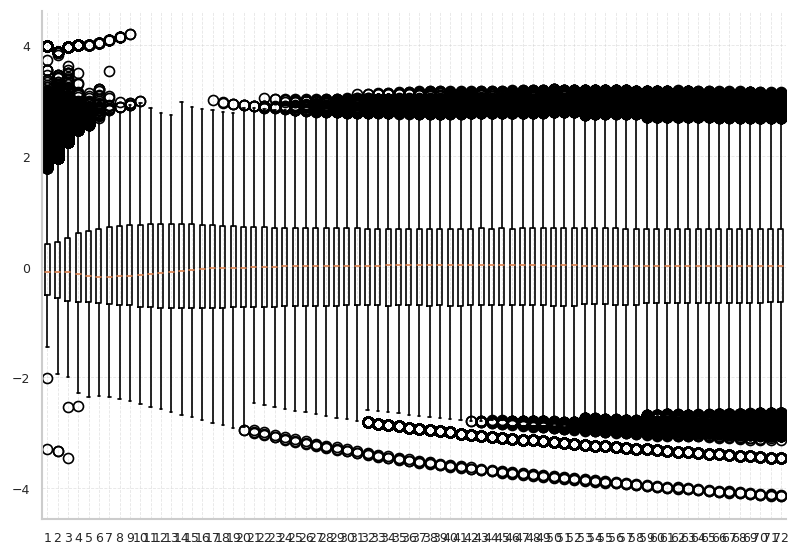

In [14]:
plt.boxplot(insulin_col_train)
plt.show()

The -5 value seems suspicious

In [15]:
all_ins =  ['insulin_av-5:55', 'insulin_av-5:50',
            'insulin_av-5:45', 'insulin_av-5:40', 'insulin_av-5:35',
            'insulin_av-5:30', 'insulin_av-5:25', 'insulin_av-5:20',
            'insulin_av-5:15', 'insulin_av-5:10', 'insulin_av-5:05',
            'insulin_av-5:00', 'insulin_av-4:55', 'insulin_av-4:50',
            'insulin_av-4:45', 'insulin_av-4:40', 'insulin_av-4:35',
            'insulin_av-4:30', 'insulin_av-4:25', 'insulin_av-4:20',
            'insulin_av-4:15', 'insulin_av-4:10', 'insulin_av-4:05',
            'insulin_av-4:00', 'insulin_av-3:55', 'insulin_av-3:50',
            'insulin_av-3:45', 'insulin_av-3:40', 'insulin_av-3:35',
            'insulin_av-3:30', 'insulin_av-3:25', 'insulin_av-3:20',
            'insulin_av-3:15', 'insulin_av-3:10', 'insulin_av-3:05',
            'insulin_av-3:00', 'insulin_av-2:55', 'insulin_av-2:50',
            'insulin_av-2:45', 'insulin_av-2:40', 'insulin_av-2:35',
            'insulin_av-2:30', 'insulin_av-2:25', 'insulin_av-2:20',
            'insulin_av-2:15', 'insulin_av-2:10', 'insulin_av-2:05',
            'insulin_av-2:00', 'insulin_av-1:55', 'insulin_av-1:50',
            'insulin_av-1:45', 'insulin_av-1:40', 'insulin_av-1:35',
            'insulin_av-1:30', 'insulin_av-1:25', 'insulin_av-1:20',
            'insulin_av-1:15', 'insulin_av-1:10', 'insulin_av-1:05',
            'insulin_av-1:00', 'insulin_av-0:55', 'insulin_av-0:50',
            'insulin_av-0:45', 'insulin_av-0:40', 'insulin_av-0:35',
            'insulin_av-0:30', 'insulin_av-0:25', 'insulin_av-0:20',
            'insulin_av-0:15', 'insulin_av-0:10', 'insulin_av-0:05',
            'insulin_av-0:00']

In [16]:
obs_index = set()

for c in all_ins:
  suspicius = insulin_col_train[insulin_col_train[c]==insulin_col_train[all_ins].min().min()]
  new_ind = set(suspicius.index)
  obs_index = obs_index.union(new_ind)

print(len(obs_index))
obs_index = list(obs_index)

1


In [17]:
insulin_col_train.loc[obs_index,all_ins]

,insulin_av-5:55,insulin_av-5:50,insulin_av-5:45,insulin_av-5:40,insulin_av-5:35,insulin_av-5:30,insulin_av-5:25,insulin_av-5:20,insulin_av-5:15,insulin_av-5:10,insulin_av-5:05,insulin_av-5:00,insulin_av-4:55,insulin_av-4:50,insulin_av-4:45,insulin_av-4:40,insulin_av-4:35,insulin_av-4:30,insulin_av-4:25,insulin_av-4:20,insulin_av-4:15,insulin_av-4:10,insulin_av-4:05,insulin_av-4:00,insulin_av-3:55,insulin_av-3:50,insulin_av-3:45,insulin_av-3:40,insulin_av-3:35,insulin_av-3:30,insulin_av-3:25,insulin_av-3:20,insulin_av-3:15,insulin_av-3:10,insulin_av-3:05,insulin_av-3:00,insulin_av-2:55,insulin_av-2:50,insulin_av-2:45,insulin_av-2:40,insulin_av-2:35,insulin_av-2:30,insulin_av-2:25,insulin_av-2:20,insulin_av-2:15,insulin_av-2:10,insulin_av-2:05,insulin_av-2:00,insulin_av-1:55,insulin_av-1:50,insulin_av-1:45,insulin_av-1:40,insulin_av-1:35,insulin_av-1:30,insulin_av-1:25,insulin_av-1:20,insulin_av-1:15,insulin_av-1:10,insulin_av-1:05,insulin_av-1:00,insulin_av-0:55,insulin_av-0:50,insulin_av-0:45,insulin_av-0:40,insulin_av-0:35,insulin_av-0:30,insulin_av-0:25,insulin_av-0:20,insulin_av-0:15,insulin_av-0:10,insulin_av-0:05,insulin_av-0:00
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p12_23446,-3.295635,-3.31864,-3.456142,-2.521097,-2.356646,-2.339636,-2.358774,-2.391604,-2.43237,-2.477208,-2.524291,-2.573032,-2.622113,-2.670768,-2.719411,-2.76766,-2.815469,-2.86264,-2.908321,-2.95335,-2.997009,-3.039381,-3.081047,-3.120936,-3.159627,-3.197715,-3.233599,-3.268401,-3.302232,-3.334561,-3.366081,-3.396911,-3.42628,-3.454827,-3.482472,-3.509036,-3.534875,-3.560099,-3.584574,-3.608084,-3.631033,-3.653321,-3.674925,-3.695803,-3.715945,-3.735894,-3.75513,-3.774261,-3.792324,-3.810428,-3.828386,-3.845782,-3.862812,-3.879737,-3.89633,-3.912664,-3.928919,-3.944828,-3.960302,-3.975789,-3.990841,-4.005467,-4.02025,-4.034582,-4.04863,-4.062715,-4.076405,-4.089606,-4.103312,-4.116653,-4.129936,-4.143015


- The analysis has highlighted some negative values for insuline. As a result the File *File_01_EDA* has been reviewed to remove all the negative values.

#### Carb

In [18]:
carb_col_train = df_train.filter(regex='carbs')
carb_col_test = df_test.filter(regex='carbs')
#carb_col_train["bg+1:00"] = df_train["bg+1:00"]

In [19]:
print(carb_col_train.shape,carb_col_test.shape)

(177024, 72) (3644, 72)


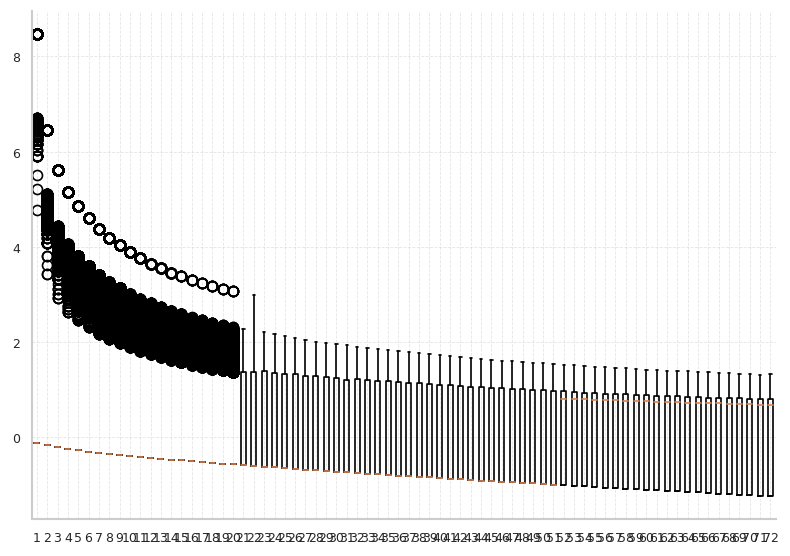

In [20]:
plt.boxplot(carb_col_train)
plt.show()

# Features Engeneering:

In [21]:
insulin_col_train = df_train.filter(regex='insulin|time|p_num|bg+1:00|hour|minute')
insulin_col_test = df_test.filter(regex='insulin|time|p_num|bg+1:00|hour|minute')
insulin_col_train["bg+1:00"] = df_train["bg+1:00"]

In [22]:
ins_subset_train = insulin_col_train[['hour', 'minute','insulin_av-1:00','insulin_av-0:00', 'bg+1:00']].copy()
ins_subset_train["Delta_past"] = ins_subset_train['insulin_av-0:00'] - ins_subset_train['insulin_av-1:00']
#ins_subset_train["Delta_fut"] = ins_subset_train['bg+1:00'] - ins_subset_train['bg-0:00']
ins_subset_train.isnull().sum()

,0
hour,0
minute,0
insulin_av-1:00,0
insulin_av-0:00,0
bg+1:00,0
Delta_past,0


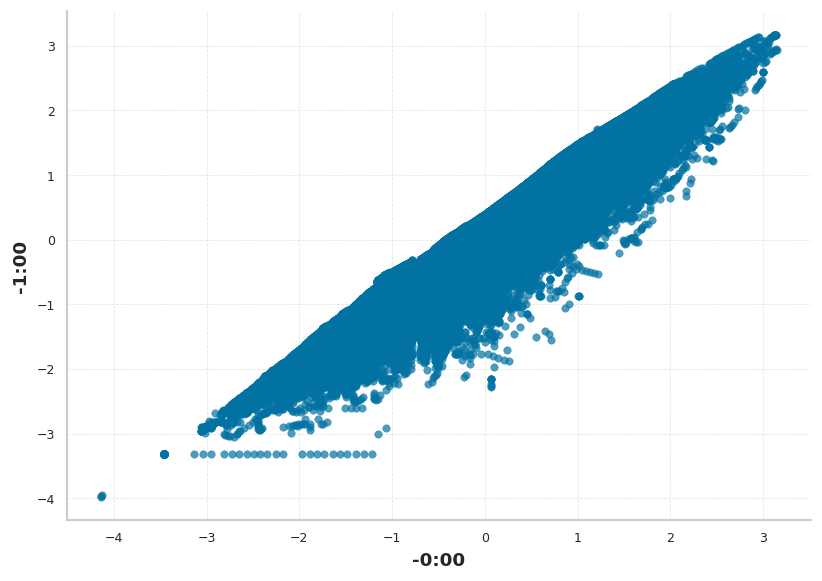

In [23]:
ins_subset_train.plot(kind="scatter",x="insulin_av-0:00",y="insulin_av-1:00",alpha=0.7)
plt.xlabel("-0:00")
plt.ylabel("-1:00")
plt.show()

## **CLUSTERS**

In [ ]:
cols = ['bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40','bg-5:35', 'bg-5:30',
        'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10','bg-5:05', 'bg-5:00',
        'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40','bg-4:35', 'bg-4:30',
        'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10','bg-4:05', 'bg-4:00',
        'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40','bg-3:35', 'bg-3:30',
        'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10','bg-3:05', 'bg-3:00',
        'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40','bg-2:35', 'bg-2:30',
        'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10','bg-2:05', 'bg-2:00',
        'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40','bg-1:35', 'bg-1:30',
        'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10','bg-1:05', 'bg-1:00',
        'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40','bg-0:35', 'bg-0:30',
        'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10','bg-0:05', 'bg-0:00']

# Train dataframe:
bg_col_train["mean_bg"] = bg_col_train[cols].mean(axis=1)
bg_col_train["std_bg"] = bg_col_train[cols].std(axis=1)
bg_col_train["med_bg"] = bg_col_train[cols].median(axis=1)
bg_col_train["skew_bg"] = bg_col_train[cols].skew(axis=1)
bg_col_train["curtosis_bg"] = bg_col_train[cols].kurtosis(axis=1)
# test dataframe:
bg_col_test["mean_bg"] = bg_col_test[cols].mean(axis=1)
bg_col_test["std_bg"] = bg_col_test[cols].std(axis=1)
bg_col_test["med_bg"] = bg_col_test[cols].median(axis=1)
bg_col_test["skew_bg"] = bg_col_test[cols].skew(axis=1)
bg_col_test["curtosis_bg"] = bg_col_test[cols].kurtosis(axis=1)

# Select Relevant Features
cluster_df_train = bg_col_train[["mean_bg","std_bg","skew_bg","curtosis_bg"]].copy()
cluster_df_test = bg_col_test[["mean_bg","std_bg","skew_bg","curtosis_bg"]].copy()

scaler = StandardScaler()
cluster_df_train = pd.DataFrame(scaler.fit_transform(cluster_df_train), columns=cluster_df_train.columns, index=cluster_df_train.index)
cluster_df_test = pd.DataFrame(scaler.transform(cluster_df_test), columns=cluster_df_test.columns, index=cluster_df_test.index)

In [ ]:
cluster_df_train.sample(5)

,mean_bg,std_bg,skew_bg,curtosis_bg
id,,,,
p03_11226,0.348428,0.706335,-0.182237,-0.632286
p10_9204,-0.467229,-0.313328,0.254320,-0.352394
p10_8659,-0.975975,-0.913332,-0.788279,0.214189
p10_7799,-0.724559,-0.429681,-0.110852,-0.359542
p11_5635,-0.286199,-0.262116,1.534488,1.868354


#### K-Means

In [ ]:
# # extra code – this cell generates and saves Figure 9–8

# kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(cluster_df_train)
#                 for k in range(1, 10)]
# inertias = [model.inertia_ for model in kmeans_per_k]

# plt.figure(figsize=(8, 3.5))
# plt.plot(range(1, 10), inertias, "bo-")
# plt.xlabel("$k$")
# plt.ylabel("Inertia")
# plt.show()

#### BayesianGaussianMixture

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import silhouette_score

#gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(cluster_df_train)
#             for k in range(21, 30)]
#bics = [model.bic(cluster_df_train) for model in gms_per_k]
#aics = [model.aic(cluster_df_train) for model in gms_per_k]

In [ ]:
# plt.figure(figsize=(8, 3))
# plt.plot(range(21, 30), bics, "bo-", label="BIC")
# plt.plot(range(21, 30), aics, "go--", label="AIC")
# plt.xlabel("$k$")
# plt.ylabel("Information Criterion")
# plt.axis([21, 30.5, min(aics) - 50, max(bics) + 50])
# plt.legend()

# plt.show()

In [ ]:
id_train = set(bg_col_train.p_num.unique())
id_test = set(bg_col_test.p_num.unique())

id_train.union(id_test)

{'p01',
 'p02',
 'p03',
 'p04',
 'p05',
 'p06',
 'p10',
 'p11',
 'p12',
 'p15',
 'p16',
 'p18',
 'p19',
 'p21',
 'p22',
 'p24'}

In [ ]:
bgm = GaussianMixture(n_components=22, n_init=10, random_state=42)
bgm.fit(cluster_df_train)

df_train["cluster"] = bgm.predict(cluster_df_train)
df_test["cluster"] = bgm.predict(cluster_df_test)

In [ ]:
gc.collect()

95021

In [ ]:
df_train.head()

,p_num,hour,minute,obv_n,brake-5:55,brake-5:50,brake-5:45,brake-5:40,brake-5:35,brake-5:30,brake-5:25,brake-5:20,brake-5:15,brake-5:10,brake-5:05,brake-5:00,brake-4:55,brake-4:50,brake-4:45,brake-4:40,brake-4:35,brake-4:30,brake-4:25,brake-4:20,brake-4:15,brake-4:10,brake-4:05,brake-4:00,brake-3:55,brake-3:50,brake-3:45,brake-3:40,brake-3:35,brake-3:30,brake-3:25,brake-3:20,brake-3:15,brake-3:10,brake-3:05,brake-3:00,brake-2:55,brake-2:50,brake-2:45,brake-2:40,brake-2:35,brake-2:30,brake-2:25,brake-2:20,brake-2:15,brake-2:10,...,activity-3:55,activity-3:50,activity-3:45,activity-3:40,activity-3:35,activity-3:30,activity-3:25,activity-3:20,activity-3:15,activity-3:10,activity-3:05,activity-3:00,activity-2:55,activity-2:50,activity-2:45,activity-2:40,activity-2:35,activity-2:30,activity-2:25,activity-2:20,activity-2:15,activity-2:10,activity-2:05,activity-2:00,activity-1:55,activity-1:50,activity-1:45,activity-1:40,activity-1:35,activity-1:30,activity-1:25,activity-1:20,activity-1:15,activity-1:10,activity-1:05,activity-1:00,activity-0:55,activity-0:50,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,cluster
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,6,10,0.0,-1.157431,-1.143185,-1.169954,-1.207103,-1.245293,-1.272997,-1.301345,-1.334866,-1.370234,-1.397142,-1.430575,-1.454937,-1.477174,-1.498075,-1.523195,-1.546026,-1.565938,-1.580628,-1.595535,-1.608597,-1.626168,-1.640264,-1.648749,-1.651859,-1.654809,-1.658605,-1.663082,-1.666331,-1.670034,-1.677567,-1.684440,-1.693137,-1.704127,-1.716623,-1.727405,-1.737783,-1.749894,-1.760841,-1.769188,-1.779076,-1.787496,-1.798060,-1.807265,-1.819208,-1.828699,-1.836243,...,-0.12392,-0.124373,-0.12383,-0.124062,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.124403,-0.124611,-0.125136,-0.124428,-0.124614,-0.124977,-0.124385,-0.124596,-0.125095,-0.12441,-0.124593,-0.124959,-0.124365,-0.124457,-0.1248,-0.124299,-0.124365,-0.124593,-0.124205,-0.124247,-0.124734,-0.124202,-0.124335,-0.124705,-0.124329,1.709709,16
p01_1,p01,6,25,1.0,-1.118211,-1.142661,-1.155765,-1.184454,-1.219376,-1.257748,-1.294172,-1.330247,-1.358414,-1.383418,-1.407105,-1.435910,-1.462353,-1.484797,-1.502670,-1.520559,-1.536555,-1.556921,-1.573495,-1.584605,-1.590570,-1.596059,-1.602269,-1.609212,-1.615286,-1.622093,-1.631938,-1.641032,-1.651504,-1.664660,-1.678620,-1.690982,-1.702813,-1.716001,-1.727171,-1.736295,-1.747374,-1.756933,-1.767735,-1.777855,-1.790940,-1.801358,-1.809847,-1.794789,-1.776479,-1.765042,...,-0.12392,-0.124373,-0.12383,-0.124062,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.124403,-0.124611,-0.125136,-0.124428,-0.124614,-0.124977,-0.124385,-0.124596,-0.125095,-0.12441,-0.124593,-0.124959,-0.124365,-0.124457,-0.1248,-0.124299,-0.124365,-0.124593,-0.124205,-0.124247,-0.124734,-0.124202,-0.124335,-0.124705,-0.124329,1.509468,16
p01_2,p01,6,40,2.0,-1.064244,-1.091012,-1.134496,-1.173724,-1.212690,-1.241066,-1.271696,-1.304910,-1.337880,-1.367635,-1.394151,-1.415986,-1.437668,-1.456877,-1.480236,-1.499697,-1.513807,-1.522684,-1.531385,-1.540253,-1.549908,-1.557957,-1.566461,-1.578233,-1.589580,-1.602311,-1.616730,-1.632097,-1.646085,-1.659362,-1.674426,-1.687838,-1.698734,-1.711271,-1.722026,-1.734561,-1.745865,-1.759890,-1.771257,-1.780914,-1.763495,-1.747471,-1.736059,-1.727018,-1.715997,-1.703009,...,-0.12392,-0.124373,-0.12383,-0.124062,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.124403,-0.124611,-0.12

In [ ]:
df_test.head()

,p_num,hour,minute,obv_n,brake-5:55,brake-5:50,brake-5:45,brake-5:40,brake-5:35,brake-5:30,brake-5:25,brake-5:20,brake-5:15,brake-5:10,brake-5:05,brake-5:00,brake-4:55,brake-4:50,brake-4:45,brake-4:40,brake-4:35,brake-4:30,brake-4:25,brake-4:20,brake-4:15,brake-4:10,brake-4:05,brake-4:00,brake-3:55,brake-3:50,brake-3:45,brake-3:40,brake-3:35,brake-3:30,brake-3:25,brake-3:20,brake-3:15,brake-3:10,brake-3:05,brake-3:00,brake-2:55,brake-2:50,brake-2:45,brake-2:40,brake-2:35,brake-2:30,brake-2:25,brake-2:20,brake-2:15,brake-2:10,...,activity-4:00,activity-3:55,activity-3:50,activity-3:45,activity-3:40,activity-3:35,activity-3:30,activity-3:25,activity-3:20,activity-3:15,activity-3:10,activity-3:05,activity-3:00,activity-2:55,activity-2:50,activity-2:45,activity-2:40,activity-2:35,activity-2:30,activity-2:25,activity-2:20,activity-2:15,activity-2:10,activity-2:05,activity-2:00,activity-1:55,activity-1:50,activity-1:45,activity-1:40,activity-1:35,activity-1:30,activity-1:25,activity-1:20,activity-1:15,activity-1:10,activity-1:05,activity-1:00,activity-0:55,activity-0:50,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,cluster
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p01_8459,p01,6,45,8459.0,-1.491538,-1.499681,-1.522640,-1.561205,-1.624699,-1.659314,-1.693529,-1.730812,-1.767033,-1.800866,-1.833523,-1.869369,-1.902464,-1.917367,-1.950131,-1.984419,-2.016550,-2.048992,-2.078774,-2.109396,-1.481627,-1.539151,-1.591381,-1.637948,-1.684847,-1.726739,-1.764766,-1.806035,-1.845352,-1.878732,-2.002032,-2.102731,-2.132165,-2.160458,-2.187619,-2.213537,-2.238445,-2.262909,-2.285666,-2.224257,-2.158043,-2.163145,-2.167915,-2.172633,-2.177275,-2.181469,...,-0.123806,-0.12392,-0.124373,-0.12383,-0.124062,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.124403,-0.124611,-0.125136,-0.124428,-0.124614,-0.124977,-0.124385,-0.124596,-0.125095,-0.12441,-0.124593,-0.124959,-0.124365,-0.124457,-0.1248,-0.124299,-0.124365,-0.124593,-0.124205,-0.124247,-0.124734,-0.124202,-0.124335,-0.124705,-0.124329,16
p01_8460,p01,11,25,8460.0,-0.952342,-0.980274,-1.017595,-1.055098,-1.091831,-1.130939,-1.165771,-1.223236,-1.279398,-1.327037,-1.370874,-1.413910,-1.453646,-1.491637,-1.525157,-1.561361,-1.592712,-1.622643,-1.653089,-1.682776,-1.709190,-1.774755,-1.858011,-1.886363,-1.907690,-1.932885,-1.984281,-2.003013,-2.021213,-2.068595,-2.105490,-2.134019,-2.141408,-2.152696,-2.168110,-2.207647,-2.364190,-2.527006,-2.714843,-3.120950,-3.490279,-3.622901,-3.709597,-3.846553,-4.002235,-3.841058,...,-0.123806,-0.12392,-0.124373,-0.12383,-0.124062,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.124403,-0.124611,-0.125136,-0.124428,-0.124614,-0.124977,-0.124385,-0.124596,-0.125095,-0.12441,-0.124593,-0.124959,-0.124365,-0.124457,-0.1248,-0.124299,-0.124365,-0.124593,-0.124205,-0.124247,-0.124734,-0.124202,7.506976,7.486224,7.503679,3
p01_8461,p01,14,45,8461.0,-0.952342,-0.980274,-1.017595,-1.127050,-1.150678,-1.180985,-1.212134,-1.270791,-1.301301,-1.338224,-1.372180,-1.403375,-1.400585,-1.428849,-1.491678,-1.516101,-1.512090,-1.531906,-1.579885,-1.600842,-1.797207,-1.914568,-2.064082,-2.058781,-0.902161,-0.972056,-1.034798,-1.066433,-1.224989,-1.109640,-1.002399,-0.828682,-0.876005,-0.981943,-1.155304,-1.322152,-1.597098,-1.699081,-1.864977,-2.167531,-2.195099,-2.367608,-2.481630,-2.579897,-2.720533,-2.838615,...,-0.123806,-0.12392,-0.124373,-0.12383,-0.124062,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-

In [ ]:
df_train.groupby(["cluster"])["bg+1:00"].agg(["mean","std","skew","median","count"])

,mean,std,skew,median,count
cluster,,,,,
0,-0.449916,0.710041,1.247967,-0.626435,8547
1,0.634846,1.274512,0.760957,0.408143,5471
2,-0.335215,0.726203,0.901365,-0.459568,22137
3,-0.210909,0.819261,0.768200,-0.359448,15471
4,0.872552,1.266060,0.280647,0.808625,2308
5,0.088574,1.063863,0.573729,-0.125833,139
6,0.158114,0.990496,0.745932,-0.025713,2696
7,-0.157986,0.822549,0.914731,-0.326074,1859
8,0.067281,0.959995,0.659709,-0.125833,15702


In [ ]:
df_train.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster.csv")
df_test.to_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster.csv")

In [ ]:
df_train.drop(["cluster",	"p_num",	"hour",	"minute",	"obv_n","bg+1:00"], axis=1).mean(axis=0).max(),df_train.drop(["cluster",	"p_num",	"hour",	"minute",	"obv_n","bg+1:00"], axis=1).std(axis=0).max()

(1.7805299293288198e-12, 1.0000028244906063)

In [ ]:
df_train.drop(["cluster",	"p_num",	"hour",	"minute",	"obv_n","bg+1:00"], axis=1).mean(axis=0).min(),df_train.drop(["cluster",	"p_num",	"hour",	"minute",	"obv_n","bg+1:00"], axis=1).std(axis=0).min()

(-1.0140578342485907e-11, 1.0000028244843524)

In [76]:
df_train = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/train_cluster.csv", index_col=0)
df_test = pd.read_csv("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/Glucose/test_cluster.csv", index_col=0)

df_train.head()

,p_num,hour,minute,obv_n,brake-5:55,brake-5:50,brake-5:45,brake-5:40,brake-5:35,brake-5:30,brake-5:25,brake-5:20,brake-5:15,brake-5:10,brake-5:05,brake-5:00,brake-4:55,brake-4:50,brake-4:45,brake-4:40,brake-4:35,brake-4:30,brake-4:25,brake-4:20,brake-4:15,brake-4:10,brake-4:05,brake-4:00,brake-3:55,brake-3:50,brake-3:45,brake-3:40,brake-3:35,brake-3:30,brake-3:25,brake-3:20,brake-3:15,brake-3:10,brake-3:05,brake-3:00,brake-2:55,brake-2:50,brake-2:45,brake-2:40,brake-2:35,brake-2:30,brake-2:25,brake-2:20,brake-2:15,brake-2:10,...,activity-3:55,activity-3:50,activity-3:45,activity-3:40,activity-3:35,activity-3:30,activity-3:25,activity-3:20,activity-3:15,activity-3:10,activity-3:05,activity-3:00,activity-2:55,activity-2:50,activity-2:45,activity-2:40,activity-2:35,activity-2:30,activity-2:25,activity-2:20,activity-2:15,activity-2:10,activity-2:05,activity-2:00,activity-1:55,activity-1:50,activity-1:45,activity-1:40,activity-1:35,activity-1:30,activity-1:25,activity-1:20,activity-1:15,activity-1:10,activity-1:05,activity-1:00,activity-0:55,activity-0:50,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,cluster
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,6,10,0.0,-1.157431,-1.143185,-1.169954,-1.207103,-1.245293,-1.272997,-1.301345,-1.334866,-1.370234,-1.397142,-1.430575,-1.454937,-1.477174,-1.498075,-1.523195,-1.546026,-1.565938,-1.580628,-1.595535,-1.608597,-1.626168,-1.640264,-1.648749,-1.651859,-1.654809,-1.658605,-1.663082,-1.666331,-1.670034,-1.677567,-1.684440,-1.693137,-1.704127,-1.716623,-1.727405,-1.737783,-1.749894,-1.760841,-1.769188,-1.779076,-1.787496,-1.798060,-1.807265,-1.819208,-1.828699,-1.836243,...,-0.12392,-0.124373,-0.12383,-0.124062,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.124403,-0.124611,-0.125136,-0.124428,-0.124614,-0.124977,-0.124385,-0.124596,-0.125095,-0.12441,-0.124593,-0.124959,-0.124365,-0.124457,-0.1248,-0.124299,-0.124365,-0.124593,-0.124205,-0.124247,-0.124734,-0.124202,-0.124335,-0.124705,-0.124329,1.709709,16
p01_1,p01,6,25,1.0,-1.118211,-1.142661,-1.155765,-1.184454,-1.219376,-1.257748,-1.294172,-1.330247,-1.358414,-1.383418,-1.407105,-1.435910,-1.462353,-1.484797,-1.502670,-1.520559,-1.536555,-1.556921,-1.573495,-1.584605,-1.590570,-1.596059,-1.602269,-1.609212,-1.615286,-1.622093,-1.631938,-1.641032,-1.651504,-1.664660,-1.678620,-1.690982,-1.702813,-1.716001,-1.727171,-1.736295,-1.747374,-1.756933,-1.767735,-1.777855,-1.790940,-1.801358,-1.809847,-1.794789,-1.776479,-1.765042,...,-0.12392,-0.124373,-0.12383,-0.124062,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.124403,-0.124611,-0.125136,-0.124428,-0.124614,-0.124977,-0.124385,-0.124596,-0.125095,-0.12441,-0.124593,-0.124959,-0.124365,-0.124457,-0.1248,-0.124299,-0.124365,-0.124593,-0.124205,-0.124247,-0.124734,-0.124202,-0.124335,-0.124705,-0.124329,1.509468,16
p01_2,p01,6,40,2.0,-1.064244,-1.091012,-1.134496,-1.173724,-1.212690,-1.241066,-1.271696,-1.304910,-1.337880,-1.367635,-1.394151,-1.415986,-1.437668,-1.456877,-1.480236,-1.499697,-1.513807,-1.522684,-1.531385,-1.540253,-1.549908,-1.557957,-1.566461,-1.578233,-1.589580,-1.602311,-1.616730,-1.632097,-1.646085,-1.659362,-1.674426,-1.687838,-1.698734,-1.711271,-1.722026,-1.734561,-1.745865,-1.759890,-1.771257,-1.780914,-1.763495,-1.747471,-1.736059,-1.727018,-1.715997,-1.703009,...,-0.12392,-0.124373,-0.12383,-0.124062,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.124403,-0.124611,-0.12

## PCA Based Clusters:

In [78]:
cols_bg = ['bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40','bg-5:35', 'bg-5:30',
           'bg-5:25', 'bg-5:20', 'bg-5:15', 'bg-5:10','bg-5:05', 'bg-5:00',
           'bg-4:55', 'bg-4:50', 'bg-4:45', 'bg-4:40','bg-4:35', 'bg-4:30',
           'bg-4:25', 'bg-4:20', 'bg-4:15', 'bg-4:10','bg-4:05', 'bg-4:00',
           'bg-3:55', 'bg-3:50', 'bg-3:45', 'bg-3:40','bg-3:35', 'bg-3:30',
           'bg-3:25', 'bg-3:20', 'bg-3:15', 'bg-3:10','bg-3:05', 'bg-3:00',
           'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40','bg-2:35', 'bg-2:30',
           'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10','bg-2:05', 'bg-2:00',
           'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40','bg-1:35', 'bg-1:30',
           'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10','bg-1:05', 'bg-1:00',
           'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40','bg-0:35', 'bg-0:30',
           'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10','bg-0:05', 'bg-0:00']

gc.collect()

62793

In [79]:
pca = PCA(n_components=4)

train_pca_df = df_train[cols_bg]
test_pca_df = df_test[cols_bg]

train_pca_df_ = pca.fit_transform(train_pca_df)
test_pca_df_ = pca.transform(test_pca_df)

In [80]:
print("Explained Variance: {} - {}".format(np.sum(pca.explained_variance_ratio_),pca.explained_variance_ratio_))

cols_df = ["PC_{}".format(i) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
bg_pca_train = pd.DataFrame(train_pca_df_, columns=cols_df, index=train_pca_df.index)
bg_pca_test = pd.DataFrame(test_pca_df_, columns=cols_df, index=test_pca_df.index)

bg_pca_train["bg+1:00"] = df_train["bg+1:00"]
train_pca_df["bg+1:00"] = df_train["bg+1:00"]

Explained Variance: 0.9173769432502017 - [0.54207734 0.22534151 0.1016591  0.04829899]


* **Check Correlation:**

<Axes: >

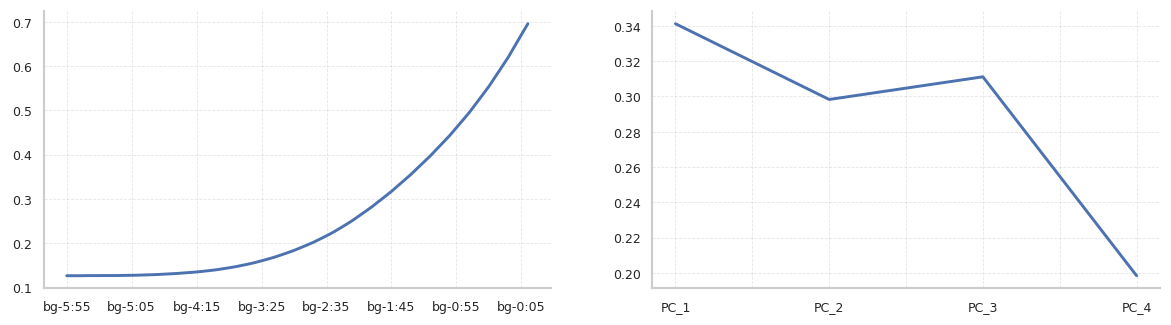

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

train_pca_df.corr()["bg+1:00"][:-1].plot(ax=axs[0])
bg_pca_train.corr()["bg+1:00"][:-1].plot(ax=axs[1])

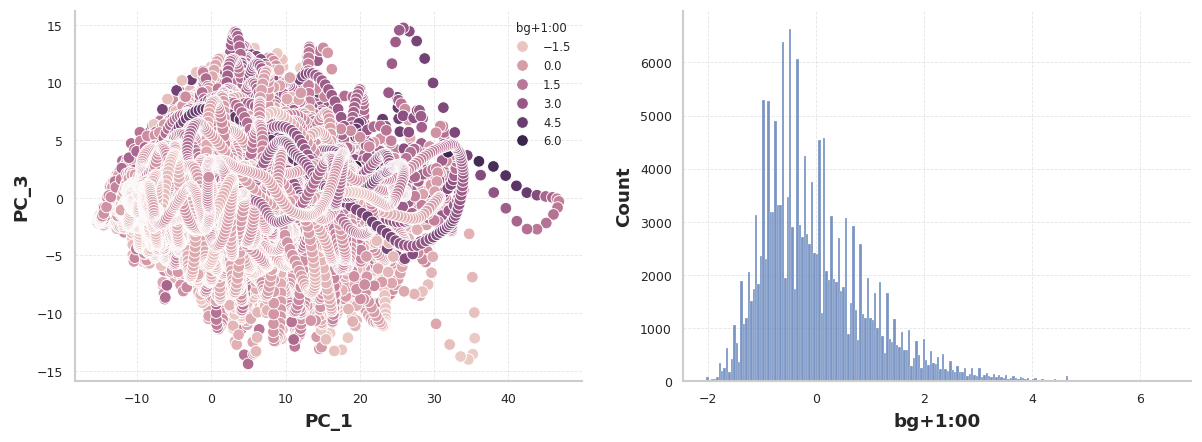

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=bg_pca_train, x="PC_1", y="PC_3", ax=axs[0], hue="bg+1:00")
sns.histplot(data=bg_pca_train, x="bg+1:00", ax=axs[1])

plt.show()

In [83]:
# cluster_df_train = bg_pca_train.drop("bg+1:00", axis=1).copy()

# kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(cluster_df_train)
#                 for k in range(1, 22)]
# inertias = [model.inertia_ for model in kmeans_per_k]

In [84]:
# plt.figure(figsize=(8, 3.5))
# plt.plot(range(1, 22), inertias, "bo-")
# plt.xlabel("$k$")
# plt.ylabel("Inertia")
# plt.show()

In [92]:
bgm = KMeans(n_clusters=4, n_init=10, random_state=42)
bgm.fit(cluster_df_train)

df_train["cluster_pca"] = bgm.predict(bg_pca_train.drop("bg+1:00", axis=1))
df_test["cluster_pca"] = bgm.predict(bg_pca_test)

In [93]:
df_train.groupby(["cluster_pca"])["bg-0:00"].agg(["mean","std","skew","median","count"])

,mean,std,skew,median,count
cluster_pca,,,,,
0,0.886169,1.002277,0.509888,0.808524,35374
1,-0.428165,0.672572,0.918566,-0.526139,88452
2,-0.174162,0.758258,0.648089,-0.259206,39148
3,0.949668,1.226025,0.577376,0.775158,14050


In [96]:
df_train = pd.concat([df_train,bg_pca_train.loc[:,["PC_1",	"PC_2",	"PC_3"]]], axis=1)
df_test = pd.concat([df_test,bg_pca_test.loc[:,["PC_1",	"PC_2",	"PC_3"]]], axis=1)
df_train.head()

,p_num,hour,minute,obv_n,brake-5:55,brake-5:50,brake-5:45,brake-5:40,brake-5:35,brake-5:30,brake-5:25,brake-5:20,brake-5:15,brake-5:10,brake-5:05,brake-5:00,brake-4:55,brake-4:50,brake-4:45,brake-4:40,brake-4:35,brake-4:30,brake-4:25,brake-4:20,brake-4:15,brake-4:10,brake-4:05,brake-4:00,brake-3:55,brake-3:50,brake-3:45,brake-3:40,brake-3:35,brake-3:30,brake-3:25,brake-3:20,brake-3:15,brake-3:10,brake-3:05,brake-3:00,brake-2:55,brake-2:50,brake-2:45,brake-2:40,brake-2:35,brake-2:30,brake-2:25,brake-2:20,brake-2:15,brake-2:10,...,activity-3:35,activity-3:30,activity-3:25,activity-3:20,activity-3:15,activity-3:10,activity-3:05,activity-3:00,activity-2:55,activity-2:50,activity-2:45,activity-2:40,activity-2:35,activity-2:30,activity-2:25,activity-2:20,activity-2:15,activity-2:10,activity-2:05,activity-2:00,activity-1:55,activity-1:50,activity-1:45,activity-1:40,activity-1:35,activity-1:30,activity-1:25,activity-1:20,activity-1:15,activity-1:10,activity-1:05,activity-1:00,activity-0:55,activity-0:50,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00,cluster,cluster_pca,PC_1,PC_2,PC_3
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,6,10,0.0,-1.157431,-1.143185,-1.169954,-1.207103,-1.245293,-1.272997,-1.301345,-1.334866,-1.370234,-1.397142,-1.430575,-1.454937,-1.477174,-1.498075,-1.523195,-1.546026,-1.565938,-1.580628,-1.595535,-1.608597,-1.626168,-1.640264,-1.648749,-1.651859,-1.654809,-1.658605,-1.663082,-1.666331,-1.670034,-1.677567,-1.684440,-1.693137,-1.704127,-1.716623,-1.727405,-1.737783,-1.749894,-1.760841,-1.769188,-1.779076,-1.787496,-1.798060,-1.807265,-1.819208,-1.828699,-1.836243,...,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.124403,-0.124611,-0.125136,-0.124428,-0.124614,-0.124977,-0.124385,-0.124596,-0.125095,-0.12441,-0.124593,-0.124959,-0.124365,-0.124457,-0.1248,-0.124299,-0.124365,-0.124593,-0.124205,-0.124247,-0.124734,-0.124202,-0.124335,-0.124705,-0.124329,1.709709,16,3,14.063925,10.131723,1.246828
p01_1,p01,6,25,1.0,-1.118211,-1.142661,-1.155765,-1.184454,-1.219376,-1.257748,-1.294172,-1.330247,-1.358414,-1.383418,-1.407105,-1.435910,-1.462353,-1.484797,-1.502670,-1.520559,-1.536555,-1.556921,-1.573495,-1.584605,-1.590570,-1.596059,-1.602269,-1.609212,-1.615286,-1.622093,-1.631938,-1.641032,-1.651504,-1.664660,-1.678620,-1.690982,-1.702813,-1.716001,-1.727171,-1.736295,-1.747374,-1.756933,-1.767735,-1.777855,-1.790940,-1.801358,-1.809847,-1.794789,-1.776479,-1.765042,...,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.124403,-0.124611,-0.125136,-0.124428,-0.124614,-0.124977,-0.124385,-0.124596,-0.125095,-0.12441,-0.124593,-0.124959,-0.124365,-0.124457,-0.1248,-0.124299,-0.124365,-0.124593,-0.124205,-0.124247,-0.124734,-0.124202,-0.124335,-0.124705,-0.124329,1.509468,16,3,14.887753,9.640414,-0.345446
p01_2,p01,6,40,2.0,-1.064244,-1.091012,-1.134496,-1.173724,-1.212690,-1.241066,-1.271696,-1.304910,-1.337880,-1.367635,-1.394151,-1.415986,-1.437668,-1.456877,-1.480236,-1.499697,-1.513807,-1.522684,-1.531385,-1.540253,-1.549908,-1.557957,-1.566461,-1.578233,-1.589580,-1.602311,-1.616730,-1.632097,-1.646085,-1.659362,-1.674426,-1.687838,-1.698734,-1.711271,-1.722026,-1.734561,-1.745865,-1.759890,-1.771257,-1.780914,-1.763495,-1.747471,-1.736059,-1.727018,-1.715997,-1.703009,...,-0.124491,-0.123929,-0.124277,-0.124772,-0.124141,-0.124577,-0.125025,-0.124326,-0.124646,-0.12505,-0.124349,-0.124604,-0.125034,-0.124259,-0.124535,-0.124875,-0.124189,-0.124537,-0.125016,-0.124403,-0.124611,-0.125136,-0.124428,-0.124614,-0.124977,-0.124385,-0.124596,-0.125095,-0.12441,-0.1245

In [91]:
bg_pca_train

,PC_1,PC_2,PC_3,PC_4,bg+1:00
id,,,,,
p01_0,14.063925,10.131723,1.246828,-1.405665,1.709709
p01_1,14.887753,9.640414,-0.345446,-1.463663,1.509468
p01_2,15.613632,8.875769,-1.923373,-1.218190,2.410552
p01_3,16.325735,7.799258,-3.189621,-0.784371,2.176938
p01_4,17.013631,6.433715,-4.050562,-0.251250,1.476095
...,...,...,...,...,...
p12_25294,-0.494948,-1.685406,0.961089,-0.220677,0.942119
p12_25295,-0.477074,-1.515999,1.165328,-0.038821,0.875372
p12_25296,-0.453540,-1.309180,1.368613,0.183200,0.808625
